In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from alpha_vantage.timeseries import TimeSeries
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM

In [4]:
# Define stock tickers for analysis and fetching data of multiple stocks

In [5]:
tickers = ["TSLA", "AAPL", "MSFT", "GOOGL", "AMZN" ,"ORCL" ,"INTC" ,"NVDA" ,"META" ,"BABA"]  # Add more tickers as needed

In [6]:
# Function to fetch intraday data for multiple stocks

In [7]:
def fetch_stock_data(ticker):                                             # Using yahoo finance
    data = yf.download(ticker, interval='5m', period='5d')
    data.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
    data['Return'] = data['close'].pct_change()
    data['Target'] = (data['close'].shift(-1) > data['close']).astype(int)
    data.dropna(inplace=True)
    return data

In [8]:
# Fetch and process data for all tickers

In [9]:
all_data = {}
for ticker in tickers:
    all_data[ticker] = fetch_stock_data(ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
all_data[tickers[0]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2025-01-02 14:35:00+00:00 to 2025-01-08 20:55:00+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       389 non-null    float64
 1   high       389 non-null    float64
 2   low        389 non-null    float64
 3   close      389 non-null    float64
 4   adj_close  389 non-null    float64
 5   volume     389 non-null    int64  
 6   Return     389 non-null    float64
 7   Target     389 non-null    int32  
dtypes: float64(6), int32(1), int64(1)
memory usage: 25.8 KB


In [11]:
all_data[tickers[0]].head()

,open,high,low,close,adj_close,volume,Return,Target
Datetime,,,,,,,,
2025-01-02 14:35:00+00:00,380.504791,380.504791,382.850006,373.410004,381.850006,6201608,-0.021719,1
2025-01-02 14:40:00+00:00,384.750000,384.750000,386.309998,378.899994,380.420013,3603463,0.014702,1
2025-01-02 14:45:00+00:00,388.343414,388.343414,388.440002,383.873505,384.875000,2654646,0.013126,1
2025-01-02 14:50:00+00:00,389.334991,389.334991,389.600006,386.109985,388.339996,2314309,0.005826,1
2025-01-02 14:55:00+00:00,388.345001,388.345001,389.779999,387.690002,389.367004,1745529,0.004092,0


In [12]:
all_data[tickers[0]].tail()

,open,high,low,close,adj_close,volume,Return,Target
Datetime,,,,,,,,
2025-01-08 20:35:00+00:00,394.890106,394.890106,396.480011,394.870087,395.850006,467147,-0.002123,0
2025-01-08 20:40:00+00:00,396.976593,396.976593,397.000000,394.750000,395.049988,549774,-0.000304,1
2025-01-08 20:45:00+00:00,397.039886,397.039886,397.389893,396.372498,396.820007,717209,0.004110,0
2025-01-08 20:50:00+00:00,397.470001,397.470001,397.890015,395.769989,396.924988,1182022,-0.001520,0
2025-01-08 20:55:00+00:00,395.000000,395.000000,397.239990,394.500000,397.239990,1795522,-0.003209,0


In [13]:
# Analyze market hours only

In [14]:
def filter_market_hours(data):
    market = data.between_time('09:30:00', '16:00:00').copy()
    market.sort_index(inplace=True)
    return market

In [15]:
for ticker in tickers:
    all_data[ticker] = filter_market_hours(all_data[ticker])

In [64]:
# GBC results

In [29]:
predictions_gb_hyp = gb_hyp_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions_gb_hyp)
f1 = f1_score(y_test, predictions_gb_hyp)
precision = precision_score(y_test, predictions_gb_hyp)
recall = recall_score(y_test, predictions_gb_hyp)

print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")
print(f"Gradient Boosting F1 Score: {f1:.2f}")
print(f"Gradient Boosting Precision: {precision:.2f}")
print(f"Gradient Boosting Recall: {recall:.2f}")

Gradient Boosting Model Accuracy: 0.54
Gradient Boosting F1 Score: 0.65
Gradient Boosting Precision: 0.52
Gradient Boosting Recall: 0.87


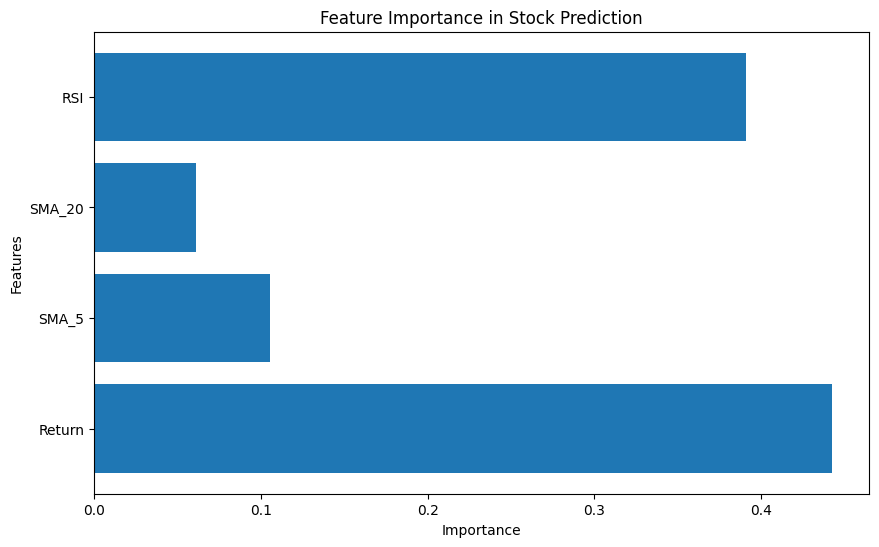

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(['Return', 'SMA_5', 'SMA_20', 'RSI'], gb_hyp_model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Stock Prediction')
plt.show()

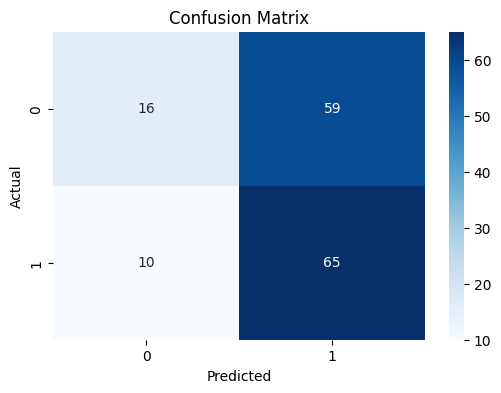

In [31]:
conf_matrix = confusion_matrix(y_test, predictions_gb_hyp)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
def predict_trending_stocks(data, model, scaler):
    tomorrow_predictions = {}
    for ticker in tickers:
        stock_data = data[ticker]
        X_future = stock_data[['Return', 'SMA_5', 'SMA_20', 'RSI']].dropna().tail(1)  
        if not X_future.empty:
            X_future_scaled = scaler.transform(X_future)
            prediction = model.predict(X_future_scaled)[0]
            tomorrow_predictions[ticker] = "Up" if prediction == 1 else "Down"
        else:
            tomorrow_predictions[ticker] = "No Data"
    return tomorrow_predictions

In [33]:
trending_stocks = predict_trending_stocks(all_data, gb_hyp_model, scaler)
print("Trending Stocks for Tomorrow:")
print(trending_stocks)

Trending Stocks for Tomorrow:
{'TSLA': 'Up', 'AAPL': 'Up', 'MSFT': 'Up', 'GOOGL': 'Down', 'AMZN': 'Up', 'ORCL': 'Up', 'INTC': 'Down', 'NVDA': 'Down', 'META': 'Up', 'BABA': 'Up'}


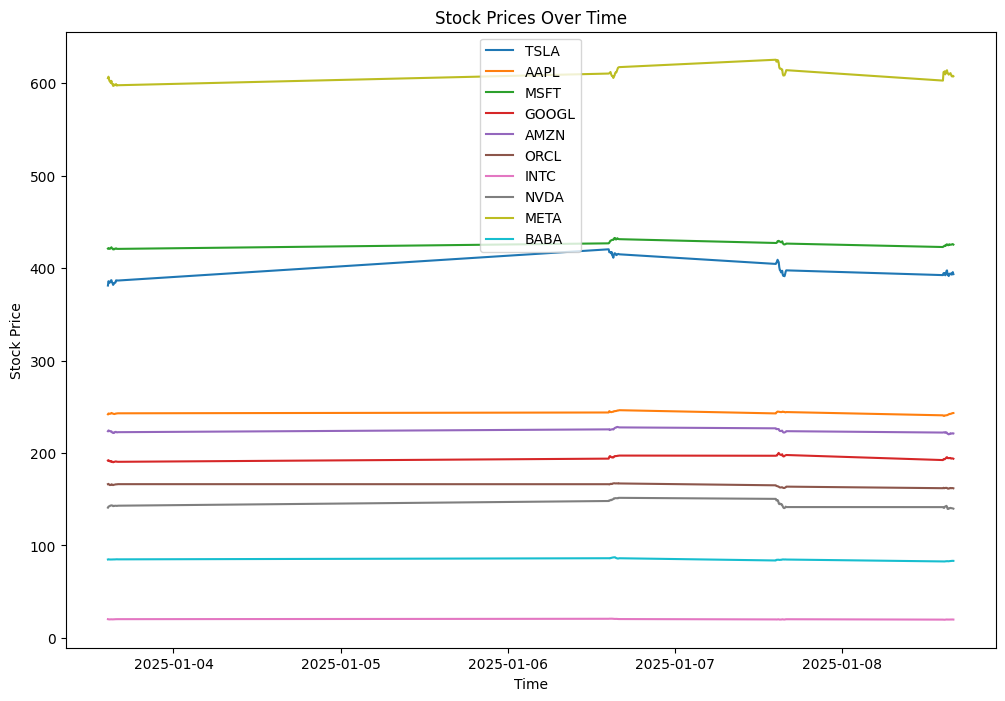

In [35]:
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(all_data[ticker].index, all_data[ticker]['close'], label=ticker)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

In [65]:
# LSTM results

In [42]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_lstm_test, y_lstm_test)
print(f"LSTM Model Loss: {lstm_loss:.4f}")
print(f"LSTM Model Accuracy: {lstm_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4627 - loss: 0.7189
LSTM Model Loss: 0.7187
LSTM Model Accuracy: 0.4690


In [43]:
predictions_lstm = (lstm_model.predict(X_lstm_test) > 0.5).astype(int).flatten()

accuracy_lstm = accuracy_score(y_lstm_test, predictions_lstm)
f1_lstm = f1_score(y_lstm_test, predictions_lstm)
precision_lstm = precision_score(y_lstm_test, predictions_lstm)
recall_lstm = recall_score(y_lstm_test, predictions_lstm)

print(f"LSTM Model Accuracy: {accuracy_lstm:.2f}")
print(f"LSTM F1 Score: {f1_lstm:.2f}")
print(f"LSTM Precision: {precision_lstm:.2f}")
print(f"LSTM Recall: {recall_lstm:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step
LSTM Model Accuracy: 0.47
LSTM F1 Score: 0.63
LSTM Precision: 0.48
LSTM Recall: 0.90


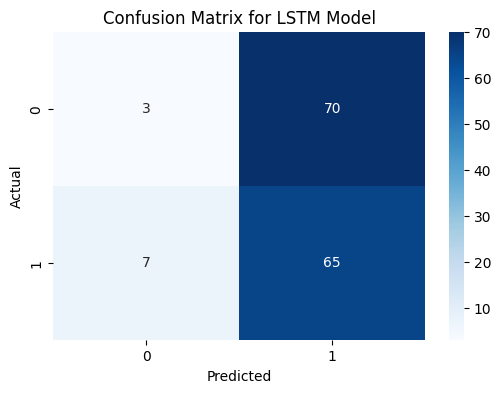

In [44]:
conf_matrix_lstm = confusion_matrix(y_lstm_test, predictions_lstm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [45]:
def predict_trends_lstm(data, model, time_steps):
    tomorrow_predictions_lstm = {}
    for ticker in tickers:
        stock_data = data[ticker].tail(time_steps)
        if len(stock_data) >= time_steps:
            X_future = stock_data[['Return', 'SMA_5', 'SMA_20', 'RSI']].tail(time_steps).values
            X_future = X_future.reshape((1, time_steps, X_future.shape[1]))
            prediction = model.predict(X_future)
            tomorrow_predictions_lstm[ticker] = "Up" if prediction > 0.5 else "Down"
        else:
            tomorrow_predictions_lstm[ticker] = "No Data"
    return tomorrow_predictions_lstm

In [46]:
trending_stocks_lstm = predict_trends_lstm(all_data, lstm_model, time_steps)
print("LSTM Predicted Trending Stocks for Tomorrow:")
print(trending_stocks_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
LSTM Predicted Trending Stocks for Tomorrow:
{'TSLA': 'Down', 'AAPL': 'Down', 'MSFT': 'Down', 'GOOGL': 'Down', 'AMZN': 'Down', 'ORCL': 'Down', 'INTC': 'Up', 'NVDA': 'Down', 'META': 'Down', 'BABA': 'Down'}


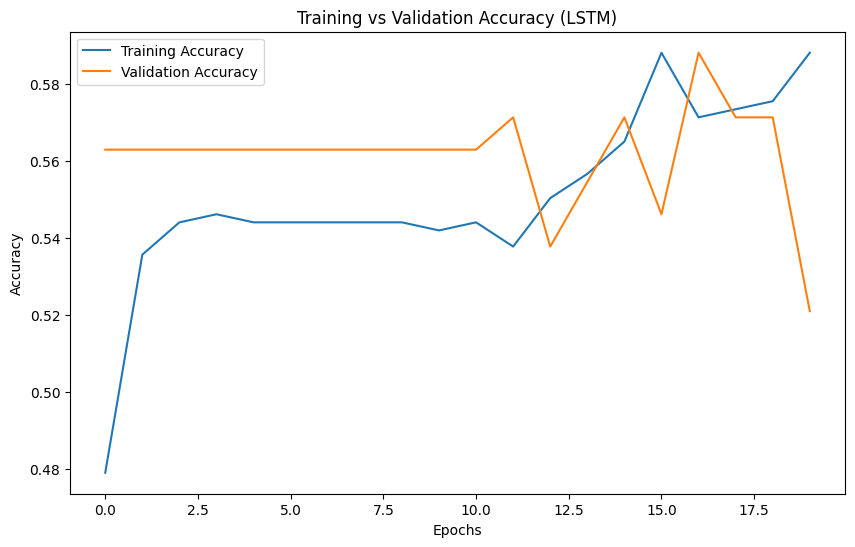

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (LSTM)')
plt.legend()
plt.show()

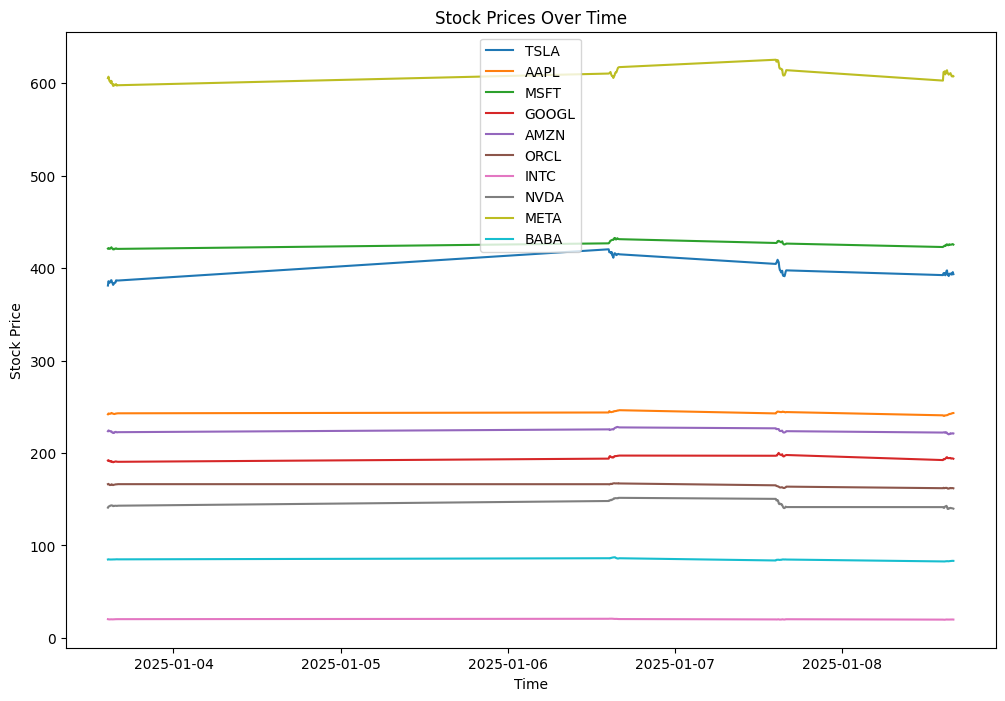

In [49]:
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(all_data[ticker].index, all_data[ticker]['close'], label=ticker)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

In [66]:
# DNN results

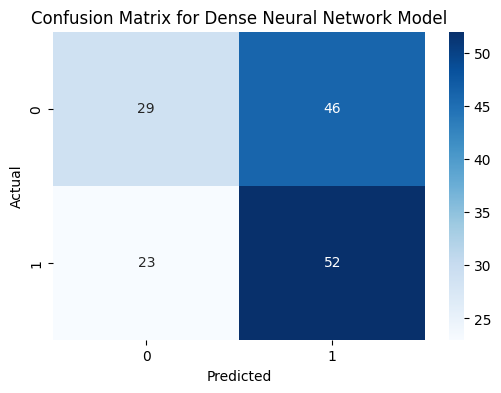

In [54]:
conf_matrix_dnn = confusion_matrix(y_test, predictions_dnn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Dense Neural Network Model')
plt.show()

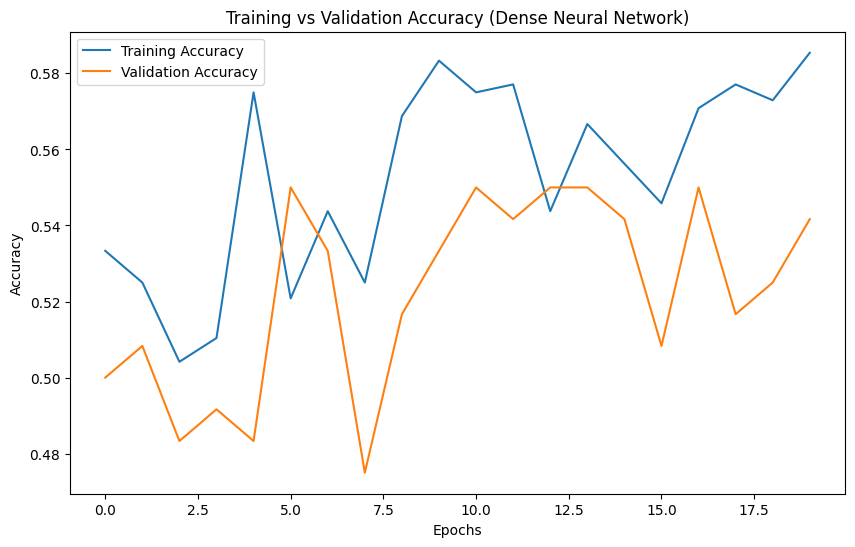

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Dense Neural Network)')
plt.legend()
plt.show()

In [56]:
def predict_trending_stocks_dnn(data, model, scaler):
    tomorrow_predictions = {}
    for ticker in tickers:
        stock_data = data[ticker]
        X_future = stock_data[['Return', 'SMA_5', 'SMA_20', 'RSI']].dropna().tail(1)
        if not X_future.empty:
            X_future = scaler.transform(X_future)
            prediction = (model.predict(X_future) > 0.5).astype(int)[0][0]
            tomorrow_predictions[ticker] = "Up" if prediction == 1 else "Down"
        else:
            tomorrow_predictions[ticker] = "No Data"
    return tomorrow_predictions

In [57]:
trending_stocks_dnn = predict_trending_stocks_dnn(all_data, dnn_model, scaler)
print("Trending Stocks for Tomorrow (Dense Neural Network):")
print(trending_stocks_dnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Trending Stocks for Tomorrow (Dense Neural Network):
{'TSLA': 'Up', 'AAPL': 'Up', 'MSFT': 'Up', 'GOOGL': 'Down', 'AMZN': 'Down', 'ORCL': 'Down', 'INTC': 'Down', 'NVDA': 'Down', 'META': 'Up', 'BABA': 'Up'}


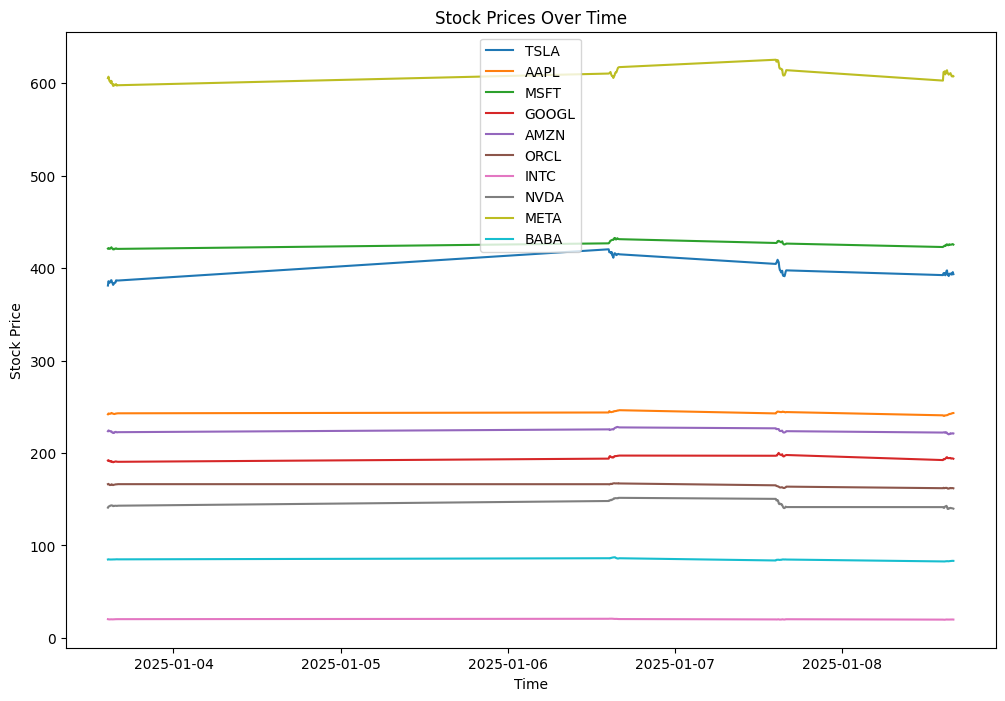

In [59]:

plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(all_data[ticker].index, all_data[ticker]['close'], label=ticker)

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()
